In [56]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

In [57]:
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 14
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

In [58]:
emart_df=pd.read_csv('C:/MartRepository/4Mart/data/Emart_info.csv',encoding='utf-8')

In [59]:
lotte_df=pd.read_csv('C:/MartRepository/4Mart/data/lotte.csv',encoding='utf-8')

In [60]:
home_df=pd.read_csv('C:/MartRepository/4Mart/data/Homeplus_shop_info_loc4.csv',encoding='utf-8')


In [61]:
top_df=pd.read_csv('C:/MartRepository/4Mart/data/topmart_shop_info_loc.csv',encoding='utf-8')


In [62]:
mart_df=pd.concat([lotte_df, emart_df,home_df,top_df],axis=0) 

In [63]:
mart_df.to_csv('./mart.csv',encoding='utf-8',index=False)

In [64]:
mart_df = pd.read_csv('./mart.csv',encoding='utf-8')
mart_df.head()

,store,address,Latitude,Longitude,tel
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500


In [65]:
map = folium.Map(location=[35.2114828,129.0776055],zoom_start=10,tiles='OpenStreetMap')

for i in mart_df.index:
    lt_lat = mart_df.loc[i,'Latitude']
    lt_long = mart_df.loc[i,'Longitude']


    # popup = folium.Popup(iframe, min_width=200, max_width=200)
    name = f"[{mart_df.loc[i, 'store']}]"
    address = f"{mart_df.loc[i, 'address']}"
    tel = f"{mart_df.loc[i, 'tel']}"

    color='green'
    if mart_df.loc[i,'store']=='롯데마트':
        color ='green'
    elif mart_df.loc[i,'store']=='이마트':
        color ='gray'
    elif mart_df.loc[i,'store']=='홈플러스':
        color ='red'
    elif mart_df.loc[i,'store']=='탑마트':
        color ='orange'

    folium.Marker(location=[lt_lat,lt_long],color=color,icon=folium.Icon(icon='gift'),tooltip=name).add_to(map)
map

In [66]:
mart_df['brand']=mart_df['store'].str.split().str[0]

In [67]:
mart_df

,store,address,Latitude,Longitude,tel,brand
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,롯데마트
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,롯데마트
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,롯데마트
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,롯데마트
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,롯데마트
...,...,...,...,...,...,...
455,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300,탑마트
456,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000,탑마트
457,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008,탑마트
458,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2,탑마트


In [68]:
mart_df=mart_df[['brand','store','address','Latitude','Longitude','tel']]

In [69]:
mart_df.to_csv('./mart2.csv',encoding='utf-8',index=False)

<AxesSubplot:xlabel='brand', ylabel='count'>

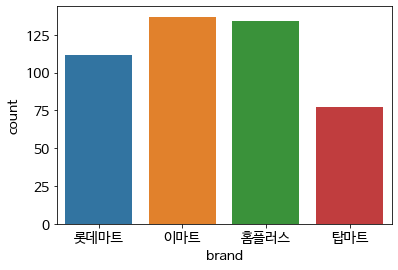

In [70]:
sns.countplot(data=mart_df,x='brand')